In [1]:
import os

In [2]:
import numpy as np
np.genfromtxt('../middleware/data/data.csv',delimiter=',', dtype= "U5")

array([['TIME', 'OUT_T', 'OUT_H', ..., 'FAN_S', 'AC_ST', 'HEATE'],
       ['2020-', '22.0', '40.0', ..., '0', '0', '0'],
       ['2020-', '22.0', '41.0', ..., '0', '0', '0'],
       ...,
       ['2020-', '22.0', '40.0', ..., '0', '0', '0'],
       ['2020-', '22.0', '40.0', ..., '0', '0', '0'],
       ['2020-', '22.0', '37.0', ..., '0', '0', '0']], dtype='<U5')

In [3]:
import csv 

def process_metadata(path):
    with open(path, 'r', encoding="utf-8") as csvfile:
        reader = csv.DictReader(csvfile)
        a = list(reader)
        return a

In [4]:
import pandas as pd
def read_data(data_path):
    data_frame = pd.read_csv(data_path)
    #data_frame = data_frame.set_index(pd.DatetimeIndex(data_frame['TIME']))
    #data_frame = data_frame.drop(columns=['icon', 'summary'])
    return data_frame

In [5]:
DATASET_PATH = "../middleware/data"
# DATASET_PATH = "D:/Thesis draft/code/UCF_ScaledHomeMqtt/middleware/data"
data_file_name = "data.csv"
# data_file_name = "data-only-increase.csv"
columns_to_drop = ["OUT_H[%]","T6[*K]","H6[%]","T12[*K]","H12[%]","T18[*K]",
                  "H18[%]","T19[*K]","H19[%]","T24[*K]","H24[%]","T25[*K]","H25[%]",
                  "T26[*K]","H26[%]","FAN_STATE","AC_STATE","HEATER_STATE"]

FMT = '%Y-%m-%d %H:%M:%S.%f'

data_path = os.path.join(DATASET_PATH, data_file_name)
# print(data_path.replace('/','\\'))
data = read_data(data_path)
data.head()

,TIME,OUT_T[*K],OUT_H[%],T6[*K],H6[%],T12[*K],H12[%],T18[*K],H18[%],T19[*K],...,T24[*K],H24[%],T25[*K],H25[%],T26[*K],H26[%],LAMP_STATE,FAN_STATE,AC_STATE,HEATER_STATE
0,2020-01-25 21:01:43.067660,22.0,40.0,23.0,49.0,23.0,47.0,22.0,51.0,24.0,...,22.0,43.0,22.0,46.0,22.0,49.0,0,0,0,0
1,2020-01-25 21:02:34.293980,22.0,41.0,23.0,49.0,22.0,47.0,22.0,47.0,24.0,...,22.0,42.0,22.0,46.0,22.0,49.0,0,0,0,0
2,2020-01-25 21:03:35.129048,22.0,41.0,23.0,49.0,22.0,47.0,22.0,47.0,24.0,...,22.0,41.0,22.0,46.0,22.0,49.0,0,0,0,0
3,2020-01-25 21:04:19.789565,22.0,41.0,23.0,49.0,22.0,47.0,22.0,51.0,24.0,...,22.0,42.0,22.0,46.0,22.0,49.0,0,0,0,0
4,2020-01-25 21:05:06.430732,22.0,41.0,23.0,49.0,23.0,44.0,22.0,47.0,24.0,...,22.0,42.0,22.0,46.0,22.0,49.0,0,0,0,0


In [7]:
import datetime

# date_time_str = '2018-06-29 08:15:27.243860'
date_time_str = str(data["TIME"][0])
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')

print('Date:', date_time_obj.date())
print('Time:', date_time_obj.time())
print('Date-time:', date_time_obj)

Date: 2020-01-25
Time: 21:01:43.067660
Date-time: 2020-01-25 21:01:43.067660


In [11]:
data1 = data.copy()
# for i, j in data1.iterrows(): 
#     j[0] = datetime.datetime.strptime(j[0], '%Y-%m-%d %H:%M:%S.%f').time()
#     print(j[0])

def cleanData(data,cols_to_drop):
    data_cleaned = data.drop(columns=cols_to_drop)
    return data_cleaned
    
def timeDiffence(data):
    time_list = list()
    temp_list = list()
    
    t0 = (data["TIME"][0])
    for i, j in data.iterrows(): 
        el = (datetime.datetime.strptime(j[0], FMT) - datetime.datetime.strptime(t0, FMT)).seconds
        time_list.append(el)
        temp_list.append(j[1])
    return np.array(time_list), np.array(temp_list)
    
data1 = cleanData(data1,columns_to_drop)
time, temp = timeDiffence(data1)
# for el in time:
#     print (el)

array([    0,    51,   112,   156,   203,   250,   286,   327,   372,
         425,   471,   509,   577,   620,   668,   713,   754,   809,
         857,   903,   953,  1007,  1061,  1111,  1162,  1222,  1269,
        1318,  1365,  1419,  1470,  1523,  1572,  1620,  1663,  1713,
        1755,  1798,  1840,  1891,  1936,  1986,  2033,  2079,  2161,
        2218,  2271,  2321,  2367,  2413,  2479,  2527,  2573,  2625,
        2678,  2733,  2784,  2839,  2887,  2932,  2967,  3008,  3049,
        3096,  3145,  3194,  3238,  3282,  3335,  3373,  3424,  3491,
        3531,  3587,  3629,  3680,  3721,  3765,  3807,  3859,  3904,
        3951,  3986,  4027,  4078,  4121,  4175,  4236,  4284,  4331,
        4387,  4434,  4487,  4533,  4585,  4633,  4692,  4734,  4773,
        4822,  4870,  4917,  4980,  5033,  5071,  5127,  5177,  5226,
        5273,  5351,  5389,  5437,  5481,  5529,  5573,  5615,  5660,
        5700,  5775,  5830,  5882,  5924,  5979,  6061,  6110,  6158,
        6202,  6252,

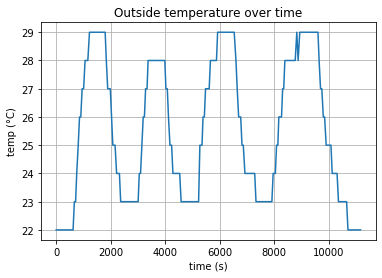

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.plot(time, temp)

ax.set(xlabel='time (s)', ylabel='temp (°C)',
       title='Outside temperature over time')
ax.grid()

fig.savefig("test.png")
plt.show()

In [28]:
np.argmax(temp)
temp[25]

np.argmin(temp)
temp[13]

time_diff_increase = time[13] - time[25]
time_diff_increase

time_diff_decrease = time[-34] - time[-11]
time_diff_decrease


-1101